In [107]:
import torch 
from torchvision import datasets,transforms
#from torchvision.transforms import ToTensor
from torch import nn ,optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt 
import torch.nn.functional as F

In [108]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

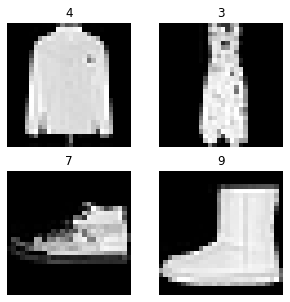

In [133]:
figure = plt.figure(figsize=(5, 5))
cols, rows = 2 , 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [109]:
class Classifier(nn.Module): 
      def __init__(self):
          super().__init__()
          self.i = nn.Linear(784,256)
          self.h = nn.Linear(256,64)
          self.output = nn.Linear(64,10)
      def forward(self, x):
          x = x.view(x.shape[0],-1)
          x = torch.sigmoid(self.i(x))
          x = torch.sigmoid(self.h(x))
          x = F.softmax(self.output(x), dim=1)

          return x

In [124]:
model = Classifier()
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.0005)


In [128]:
epoch = 5
iter = 0 
for e in range (epoch):   
    for images, labels in trainloader:
       # images = images.reshape(-1)
        out = model(images)
        loss = criterion(out,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        iter +=1

        if iter%1000==0:
          correct = 0
          total = 0 
          for images , labels in testloader:
            labels = labels
            outputs = model(images)
            _ , predicted = torch.max(outputs.data , 1)
            total += labels.size(0)
            correct+= (predicted == labels).sum()
            accuracy = (correct/total)*100
            print('Loss:{},Accuracy: {}'.format(loss.item(), accuracy))





Loss:1.5844229459762573,Accuracy: 84.375
Loss:1.5844229459762573,Accuracy: 84.375
Loss:1.5844229459762573,Accuracy: 88.54167175292969
Loss:1.5844229459762573,Accuracy: 86.71875
Loss:1.5844229459762573,Accuracy: 86.25
Loss:1.5844229459762573,Accuracy: 86.71875
Loss:1.5844229459762573,Accuracy: 87.27678680419922
Loss:1.5844229459762573,Accuracy: 87.3046875
Loss:1.5844229459762573,Accuracy: 87.84722137451172
Loss:1.5844229459762573,Accuracy: 87.5
Loss:1.5844229459762573,Accuracy: 87.35795593261719
Loss:1.5844229459762573,Accuracy: 86.97917175292969
Loss:1.5844229459762573,Accuracy: 87.37980651855469
Loss:1.5844229459762573,Accuracy: 87.61161041259766
Loss:1.5844229459762573,Accuracy: 87.70833587646484
Loss:1.5844229459762573,Accuracy: 87.3046875
Loss:1.5844229459762573,Accuracy: 87.5
Loss:1.5844229459762573,Accuracy: 87.41319274902344
Loss:1.5844229459762573,Accuracy: 87.33552551269531
Loss:1.5844229459762573,Accuracy: 87.65625
Loss:1.5844229459762573,Accuracy: 87.27678680419922
Loss:1.58